In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
def least_squares_analysis(x_values, y_values=None, title="Least Squares Analysis", xlab='x', ylab='y'):
    """
    Perform least squares regression, show plot with regression results,
    and display the calculation table in separate figures.

    Parameters
    ----------
    y_values : list or array
        Dependent variable values (y).
    x_values : list or array, optional
        Independent variable values (x). If None, uses 1,2,...,N.
    title : str, optional
        Title for the figures.
    xlab : str, optional
        Label for the x-axis.
    ylab : str, optional
        Label for the y-axis.
    """

    # Convert to numpy arrays
    y = np.array(y_values, dtype=float)
    if x_values is None:
        x = np.arange(1, len(y) + 1, dtype=float)
    else:
        x = np.array(x_values, dtype=float)

    # Perform least-squares fit: y = m*x + c
    A = np.vstack([x, np.ones(len(x))]).T
    slope, intercept = np.linalg.lstsq(A, y, rcond=None)[0]

    # Fitted values and residuals
    y_fit = slope * x + intercept
    residuals = y - y_fit
    N = len(x)

    # --- Error Calculations ---
    # Standard error of the estimate (sigma_y)
    sigma_y = np.sqrt(np.sum(residuals**2) / (N - 2))

    # Sum of squares of x
    Sxx = np.sum((x - np.mean(x))**2)

    # Error in slope (standard error)
    err_slope = sigma_y / np.sqrt(Sxx)

    # Error in intercept (standard error)
    err_intercept = sigma_y * np.sqrt(np.sum(x**2) / (N * Sxx))

    # Create DataFrame table for display
    df = pd.DataFrame({
        "x": x,
        "y": y,
        "x²": x**2,
        "xy": x * y
    })
    totals = pd.DataFrame({
        "x": [np.sum(x)],
        "y": [np.sum(y)],
        "x²": [np.sum(x**2)],
        "xy": [np.sum(x * y)]
    }, index=["Σ"])
    table = pd.concat([df, totals])

    # --- Figure 1: Regression Plot ---
    fig1, ax1 = plt.subplots(figsize=(8, 6))
    ax1.scatter(x, y, color='blue', label="Data points")
    ax1.plot(x, y_fit, color='red', label="Best Fit Line")

    textstr = '\n'.join((
        f"Slope (m)      : {slope:.4f} ± {err_slope:.4f}",
        f"Intercept (c)  : {intercept:.4f} ± {err_intercept:.4f}",
        "",
        f"Equation: y = {slope:.4f}x + {intercept:.4f}"
    ))
    ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes,
             fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="wheat", alpha=0.5))

    ax1.set_xlabel(xlab)
    ax1.set_ylabel(ylab)
    ax1.legend()
    ax1.set_title(title)
    ax1.grid(True)
    fig1.tight_layout()

    # --- Figure 2: Calculation Table ---
    fig2, ax2 = plt.subplots(figsize=(6, 3))
    ax2.axis('tight')
    ax2.axis('off')
    table_fig = ax2.table(cellText=table.round(3).values,
                          colLabels=table.columns,
                          rowLabels=table.index,
                          cellLoc='center', loc='center')
    table_fig.auto_set_font_size(False)
    table_fig.set_fontsize(12)
    table_fig.scale(1.2, 1.2)
    ax2.set_title(f"{title} - Calculation Data", pad=20)
    fig2.tight_layout()

    plt.show()

    # Return results in case needed programmatically
    return {
        "slope": slope,
        "intercept": intercept,
        "slope_error": err_slope,
        "intercept_error": err_intercept,
        "table": table
    }



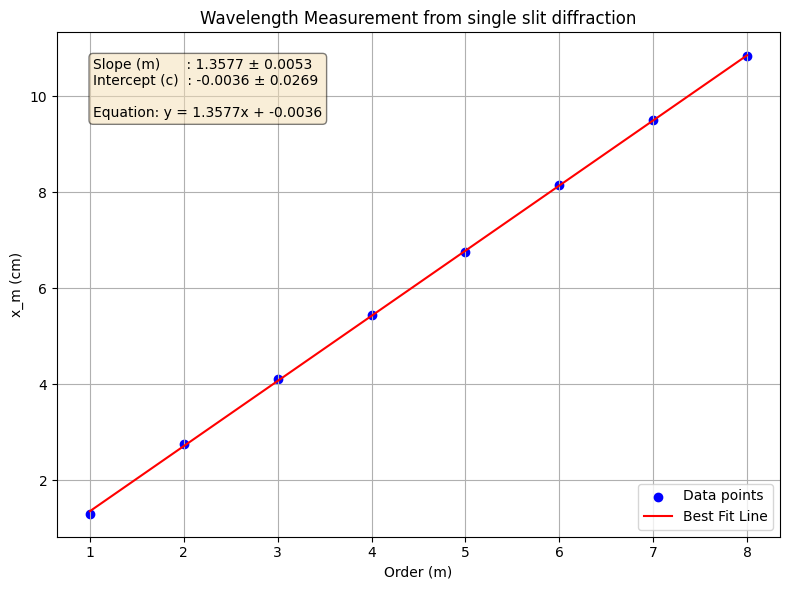

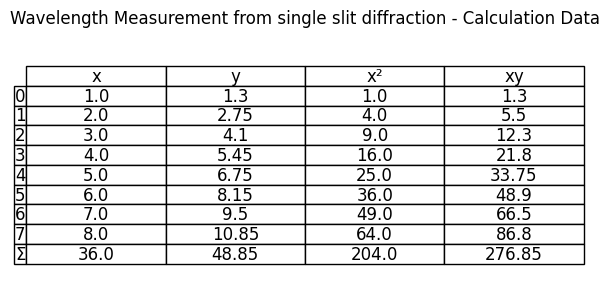

{'slope': np.float64(1.3577380952380953),
 'intercept': np.float64(-0.003571428571427386),
 'slope_error': np.float64(0.005335051452281224),
 'intercept_error': np.float64(0.026940689244365),
 'table':       x      y     x²      xy
 0   1.0   1.30    1.0    1.30
 1   2.0   2.75    4.0    5.50
 2   3.0   4.10    9.0   12.30
 3   4.0   5.45   16.0   21.80
 4   5.0   6.75   25.0   33.75
 5   6.0   8.15   36.0   48.90
 6   7.0   9.50   49.0   66.50
 7   8.0  10.85   64.0   86.80
 Σ  36.0  48.85  204.0  276.85}

In [7]:
# wavelength measurement
order_1 = [1,2,3,4,5,6,7,8]
xm_1 = [1.3,2.75,4.1,5.45,6.75,8.15,9.5,10.85]

least_squares_analysis(order_1, xm_1, title="Wavelength Measurement from single slit diffraction", xlab="Order (m)", ylab="x_m (cm)")

# slope=1.3577380952380953
#b = 0.0193333333333339
# lambda = 656.1269345nm


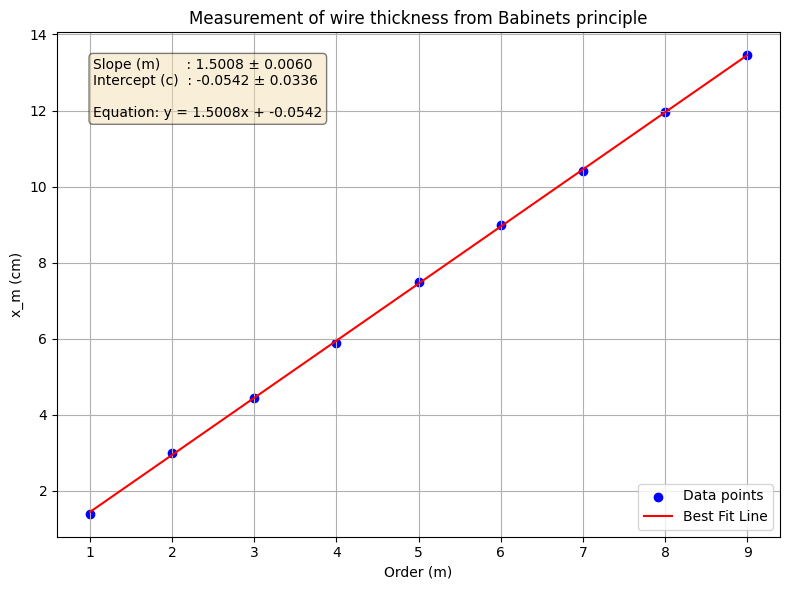

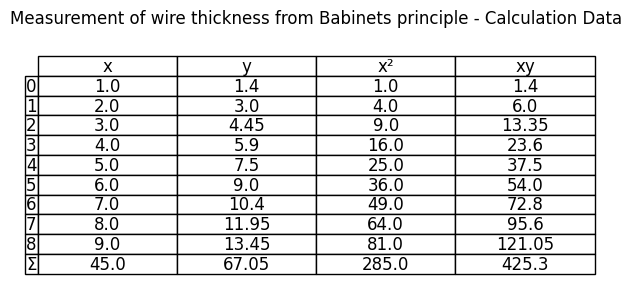

{'slope': np.float64(1.5008333333333332),
 'intercept': np.float64(-0.054166666666668695),
 'slope_error': np.float64(0.00596783707594966),
 'intercept_error': np.float64(0.0335828951485849),
 'table':       x      y     x²      xy
 0   1.0   1.40    1.0    1.40
 1   2.0   3.00    4.0    6.00
 2   3.0   4.45    9.0   13.35
 3   4.0   5.90   16.0   23.60
 4   5.0   7.50   25.0   37.50
 5   6.0   9.00   36.0   54.00
 6   7.0  10.40   49.0   72.80
 7   8.0  11.95   64.0   95.60
 8   9.0  13.45   81.0  121.05
 Σ  45.0  67.05  285.0  425.30}

In [10]:
#babinets principle

order_2 = [1,2,3,4,5,6,7,8,9]
xm_2 = [1.4,3,4.45,5.9,7.5,9,10.4,11.95,13.45]

least_squares_analysis(order_2, xm_2, title="Measurement of wire thickness from Babinets principle", xlab="Order (m)", ylab="x_m (cm)")
#slope = 1.2008333333333336


In [ ]:
#b and d

n=[]
